In [1]:
A <- c(48,56,58)
B <- c(44,46,51)
Response <- c(A,B)
Groups <- c(0,0,0,1,1,1)
#?t.test
t.test(Response~Groups,alternative="greater",var.equal=FALSE)


	Welch Two Sample t-test

data:  Response by Groups
t = 1.8935, df = 3.5278, p-value = 0.07035
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.194187       Inf
sample estimates:
mean in group 0 mean in group 1 
             54              47 


In [2]:
NYC <- read.csv("nyc.csv",header=TRUE,sep=',')
head(NYC)

Case,Restaurant,Price,Food,Decor,Service,East
<int>,<fct>,<int>,<int>,<int>,<int>,<int>
1,Daniella Ristorante,43,22,18,20,0
2,Tello's Ristorante,32,20,19,19,0
3,Biricchino,34,21,13,18,0
4,Bottino,41,20,20,17,0
5,Da Umberto,54,24,19,21,0
6,Le Madri,52,22,22,21,0


In [3]:
NYC <- read.csv("nyc.csv") #Look at the default option ?read.table
head(NYC)

Case,Restaurant,Price,Food,Decor,Service,East
<int>,<fct>,<int>,<int>,<int>,<int>,<int>
1,Daniella Ristorante,43,22,18,20,0
2,Tello's Ristorante,32,20,19,19,0
3,Biricchino,34,21,13,18,0
4,Bottino,41,20,20,17,0
5,Da Umberto,54,24,19,21,0
6,Le Madri,52,22,22,21,0


In [4]:
NYC <- read.table("nyc.csv", ,header=TRUE, sep=',') #I've heard read.table is faster!
head(NYC)

Case,Restaurant,Price,Food,Decor,Service,East
<int>,<fct>,<int>,<int>,<int>,<int>,<int>
6,Le Madri,52,22,22,21,0
7,Le Zie,34,22,16,21,0
8,Pasticcio,34,20,18,21,1
9,Belluno,39,22,19,22,1
10,Cinque Terre,44,21,17,19,1
11,Fino,45,19,17,20,1


In [5]:
Krafft <- read.table("krafft.txt", header=TRUE) #Let's download a txt file
head(Krafft) #Heuuuuu we've got a problem!

RA,VTINV,DIPINV,HEAT,KPOINT,GROUP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
6.3796,0.0051,0.0382,-296.10,7.0,1
6.8896,0.0047,0.0346,-302.96,16.0,1
7.7734,0.0041,0.0358,-314.31,11.0,1
7.8796,0.0044,0.0316,-309.81,20.8,1
7.8796,0.0041,0.0290,-316.66,21.0,1
8.3796,0.0038,0.0268,-335.52,31.5,1


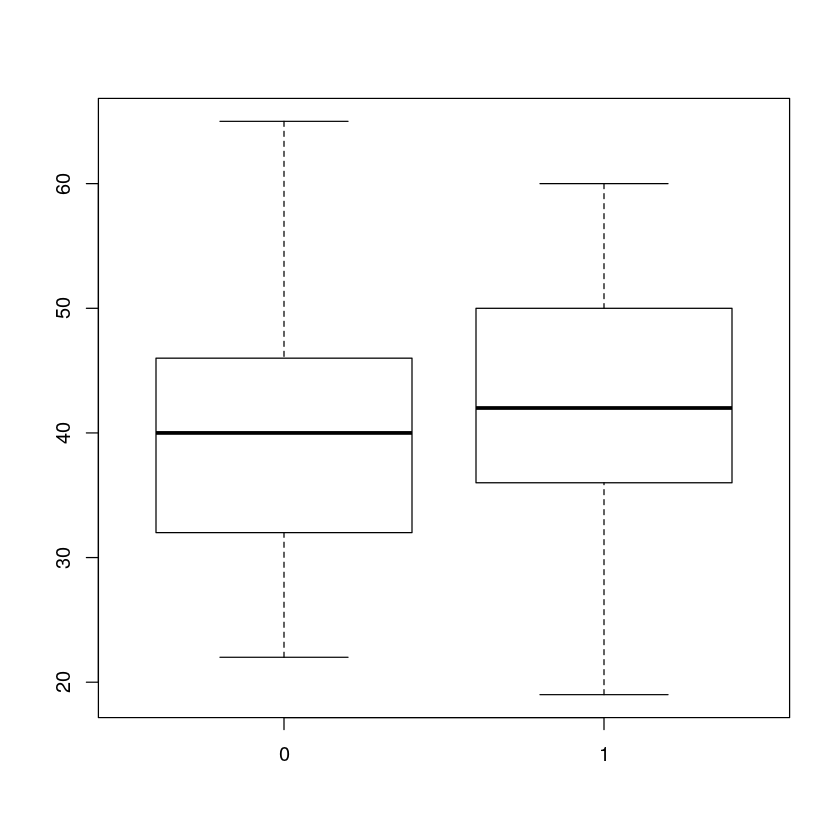

In [6]:
boxplot(NYC$Price~NYC$East)

In [7]:
# Welch–Satterthwaite equation
t.test(NYC$Price~NYC$East,alternative="two.sided",var.equal=FALSE)


	Welch Two Sample t-test

data:  NYC$Price by NYC$East
t = -0.70541, df = 89.26, p-value = 0.4824
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.416343  2.578068
sample estimates:
mean in group 0 mean in group 1 
       40.50943        41.92857 


In [8]:
anova(lm(Price~East,data=NYC))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
East,1,47.19006,47.19006,0.4939959,0.4839059
Residuals,93,8884.03100,95.52722,NA,NA


In [9]:
t.test(NYC$Price~NYC$East,alternative="two.sided",var.equal=TRUE)


	Two Sample t-test

data:  NYC$Price by NYC$East
t = -0.70285, df = 93, p-value = 0.4839
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.428716  2.590441
sample estimates:
mean in group 0 mean in group 1 
       40.50943        41.92857 


In [10]:
Form <- formula(NYC$Price~NYC$East)
t.test(Form)


	Welch Two Sample t-test

data:  NYC$Price by NYC$East
t = -0.70541, df = 89.26, p-value = 0.4824
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.416343  2.578068
sample estimates:
mean in group 0 mean in group 1 
       40.50943        41.92857 


RA,VTINV,DIPINV,HEAT,KPOINT,GROUP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
6.3796,0.0051,0.0382,-296.10,7.0,1
6.8896,0.0047,0.0346,-302.96,16.0,1
7.7734,0.0041,0.0358,-314.31,11.0,1
7.8796,0.0044,0.0316,-309.81,20.8,1
7.8796,0.0041,0.0290,-316.66,21.0,1
8.3796,0.0038,0.0268,-335.52,31.5,1


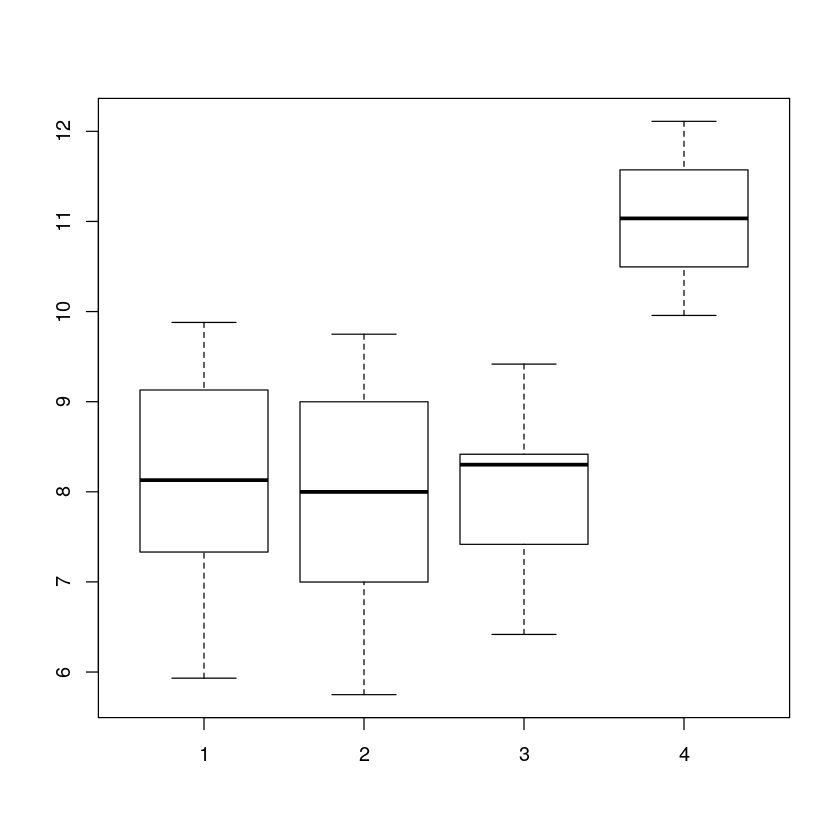

In [11]:
head(Krafft)
Form <- formula(Krafft$RA~Krafft$GROUP)
boxplot(Form)

$$SSG = \sum_{t=1}^{T}n_t(\bar{y_t} - \bar{y})^2$$

$$SSE = \sum_{t=1}^{T}\sum_{i=1}^{n_t}(y_{i,t} - \bar{y_t})^2$$

$$MSG = \dfrac{SSG}{T-1}\sim \chi_{T-1}^2$$

$$MSE = \dfrac{SSE}{n-T}\sim \chi_{n-T}^2$$

$$\dfrac{MSG}{MSE}\sim F_{T-1, N-T}$$

In [12]:
anova(lm(Form)) # DF Don't make any sense!

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Krafft$GROUP,1,6.97117,6.971170,3.440804,0.07345641
Residuals,30,60.78088,2.026029,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
as.factor(Krafft$GROUP),3,24.78903,8.263011,5.385197,0.004701422
Residuals,28,42.96301,1.534393,NA,NA


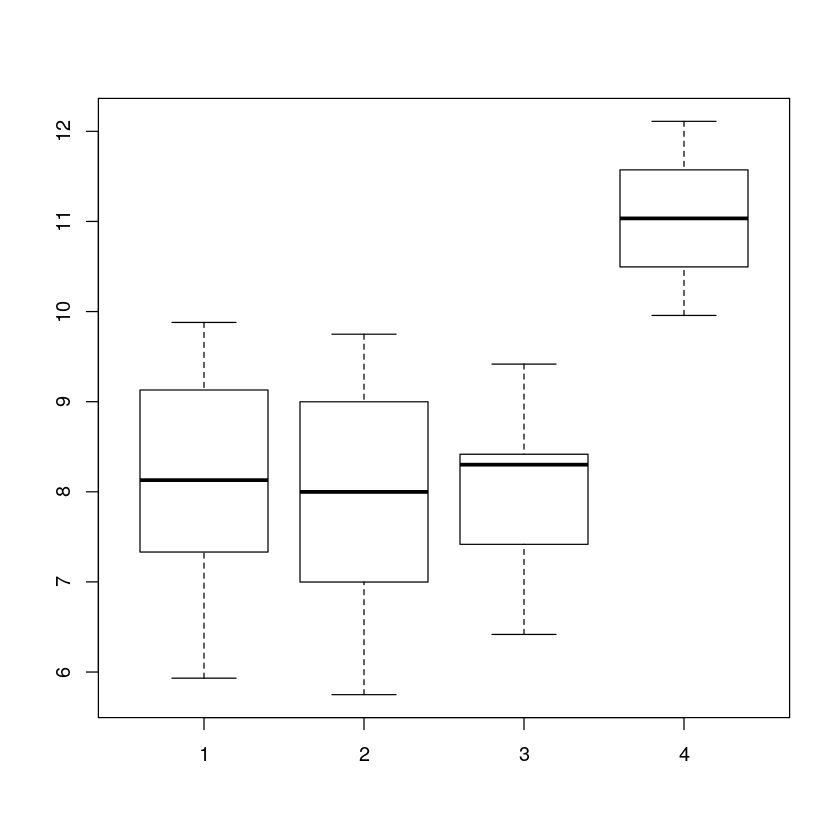

In [13]:
Form <- formula(Krafft$RA~as.factor(Krafft$GROUP))
boxplot(Form)

#t.test(Form)#This is why we introduced ANOVA!

anova(lm(Form))